# Sales prediction using Python

- **TV**: This column represents the budget spent on TV advertising (likely in thousands of dollars). The values range from 0.7 to 296.4.

- **Radio**: This column indicates the budget spent on radio advertising (likely in thousands of dollars). The values range from 0.0 to 49.6.

- **Newspaper**: This column captures the budget spent on newspaper advertising (likely in thousands of dollars). The values range from 0.3 to 114.0.

- **Sales**: This column represents the sales outcome (likely in thousands of units or dollars) corresponding to the advertising efforts. The values range from 1.6 to 27.0.

In [1]:
#Here we are importing the libraries
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Reading and printing the dataframe
df = pd.read_csv("C:/CodSoft/advertising.csv")
df

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,14.0
197,177.0,9.3,6.4,14.8
198,283.6,42.0,66.2,25.5


In [3]:
# looking into data information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [4]:
# looking into statistical information of data
df.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


In [5]:
#Returns the number of missing values in dataset
df.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

# Plotting visuals

array([[<Axes: title={'center': 'TV'}>,
        <Axes: title={'center': 'Radio'}>],
       [<Axes: title={'center': 'Newspaper'}>,
        <Axes: title={'center': 'Sales'}>]], dtype=object)

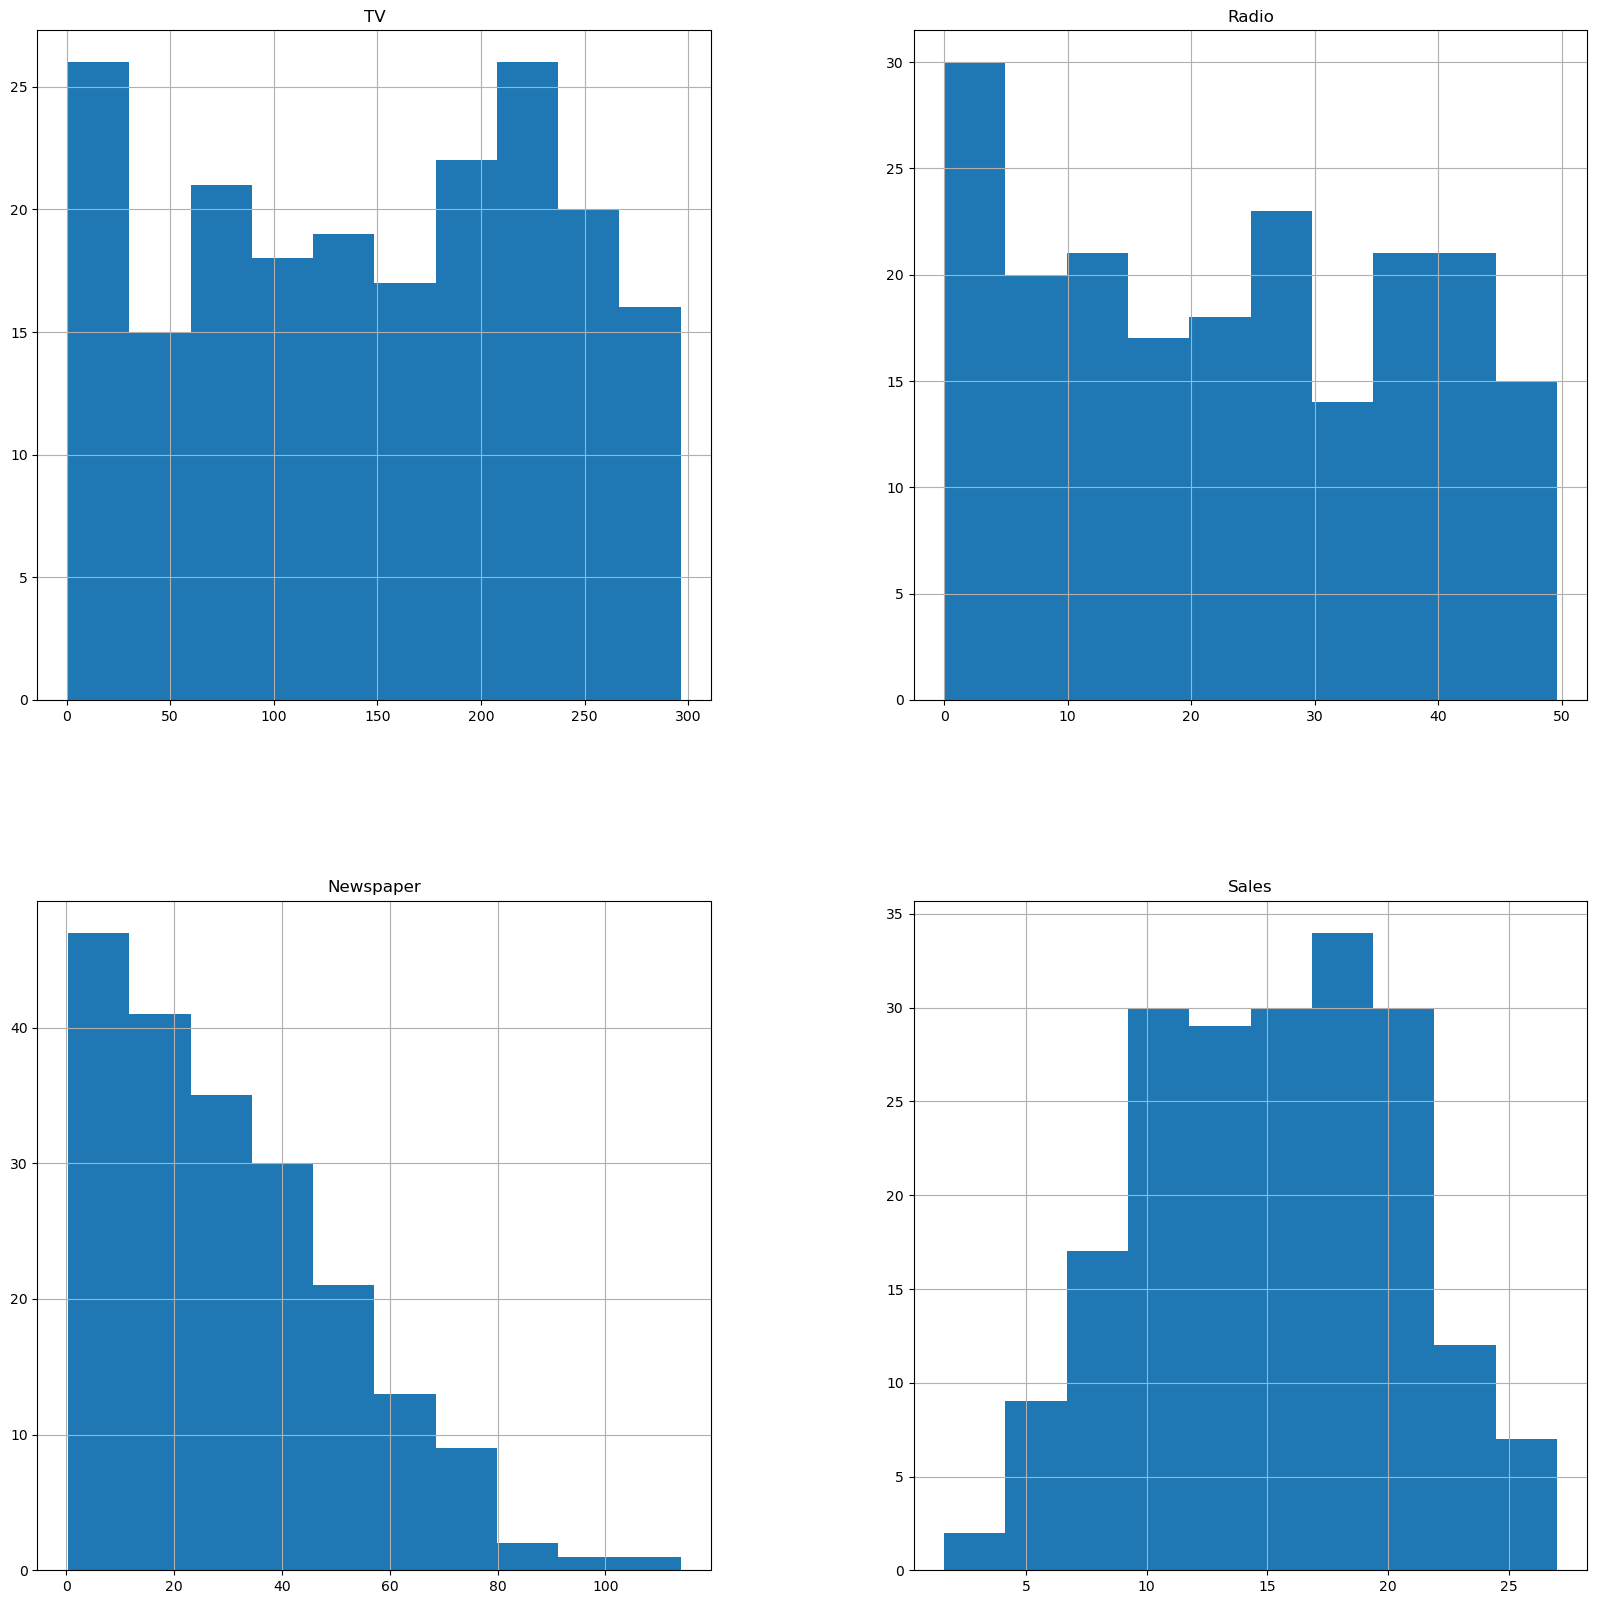

In [6]:
#Plots a histogram and giving the size of the figure width=20 and height=20
df.hist(figsize = (20,20))

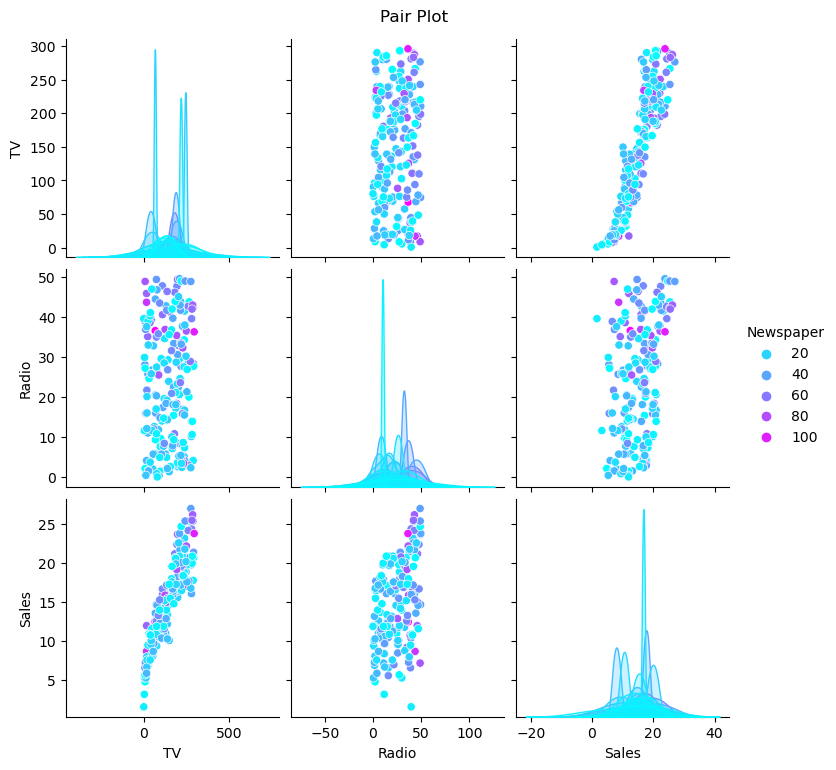

In [8]:
# Pair plot
sns.pairplot(df, hue='Newspaper', palette="cool")
plt.suptitle('Pair Plot', y=1.02)
plt.show()

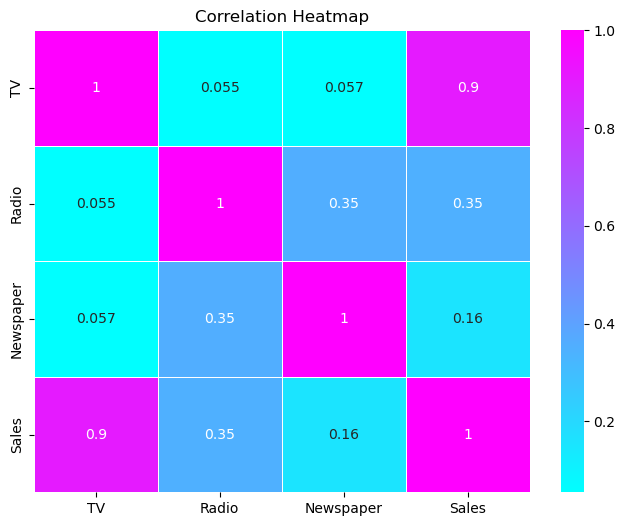

In [14]:
plt.figure(figsize=(8, 6))
sns.heatmap(df.corr(), annot=True, cmap='cool', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

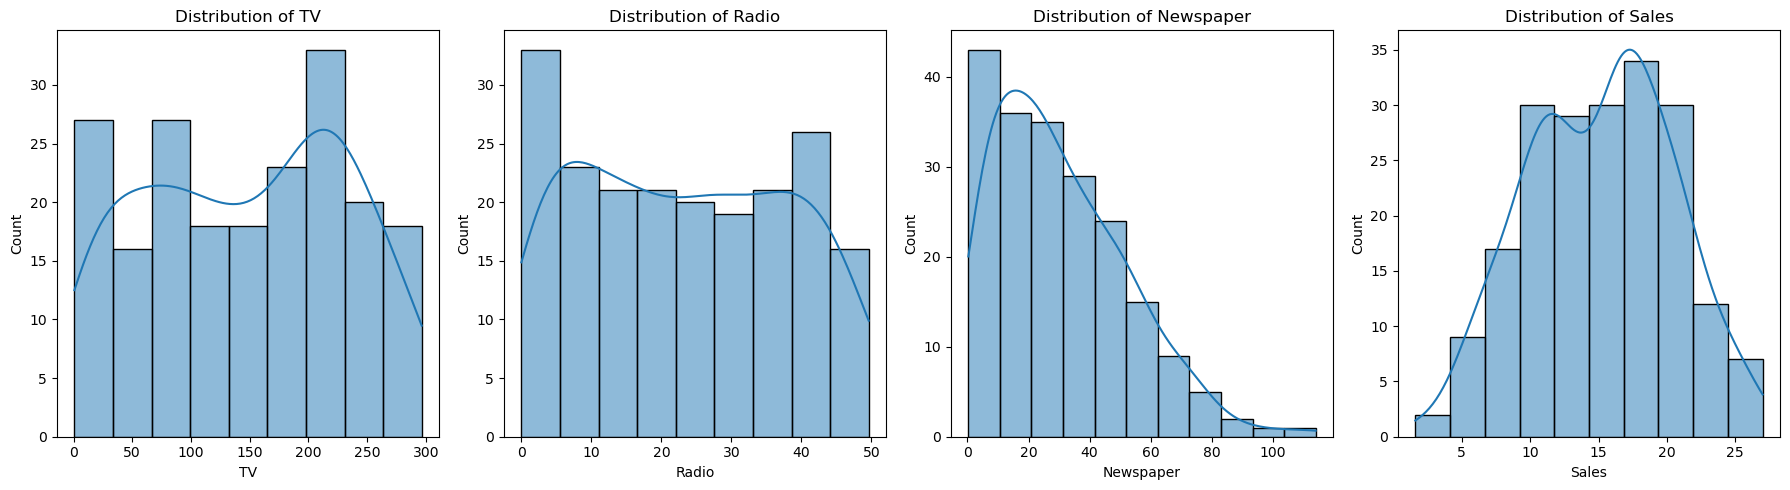

In [15]:
plt.figure(figsize=(18, 5))

# Distribution of TV
plt.subplot(1, 4, 1)
sns.histplot(df['TV'], kde=True)
plt.title('Distribution of TV')

# Distribution of Radio
plt.subplot(1, 4, 2)
sns.histplot(df['Radio'], kde=True)
plt.title('Distribution of Radio')

# Distribution of Newspaper
plt.subplot(1, 4, 3)
sns.histplot(df['Newspaper'], kde=True)
plt.title('Distribution of Newspaper')

# Distribution of Sales
plt.subplot(1, 4, 4)
sns.histplot(df['Sales'], kde=True)
plt.title('Distribution of Sales')

plt.tight_layout()
plt.show()


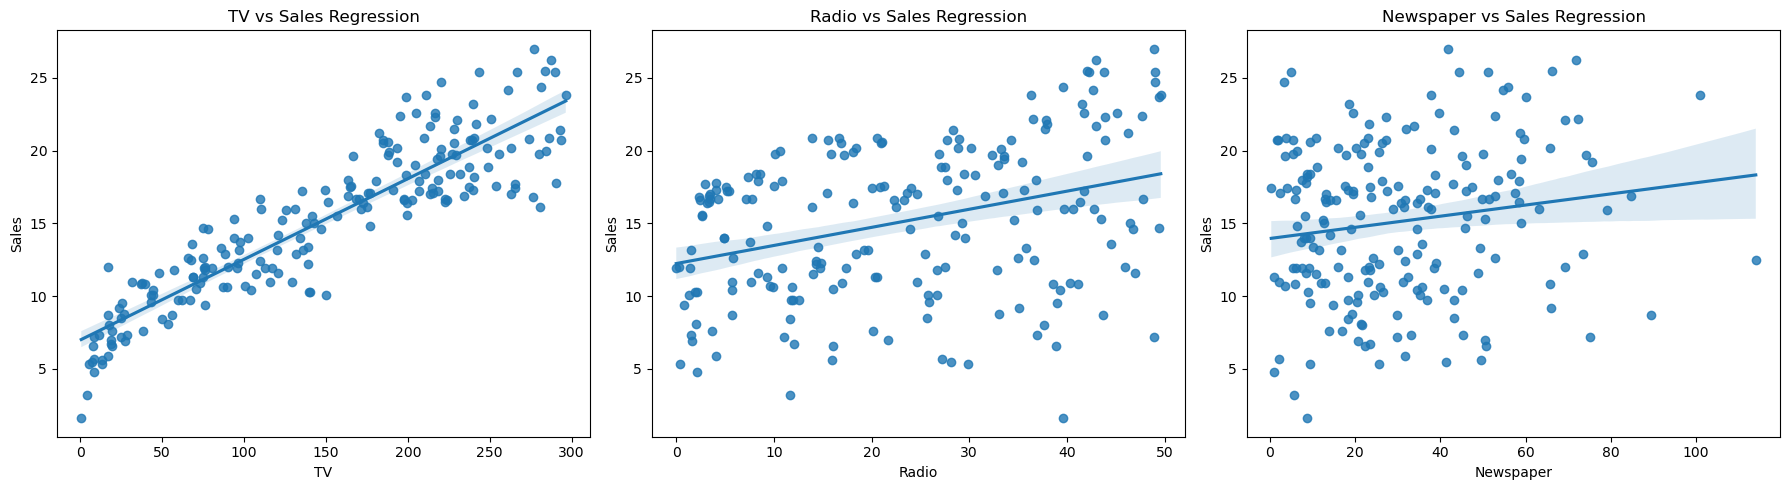

In [16]:
plt.figure(figsize=(18, 5))

# TV vs Sales
plt.subplot(1, 3, 1)
sns.regplot(x=df['TV'], y=df['Sales'])
plt.title('TV vs Sales Regression')

# Radio vs Sales
plt.subplot(1, 3, 2)
sns.regplot(x=df['Radio'], y=df['Sales'])
plt.title('Radio vs Sales Regression')

# Newspaper vs Sales
plt.subplot(1, 3, 3)
sns.regplot(x=df['Newspaper'], y=df['Sales'])
plt.title('Newspaper vs Sales Regression')

plt.tight_layout()
plt.show()

In [18]:
# copying data such that original is not affected
data = df.copy(deep= True)
data

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,14.0
197,177.0,9.3,6.4,14.8
198,283.6,42.0,66.2,25.5


# Train test splitting

In [19]:
# importing train test model and loading independent variables to x and dependent variables to y
from sklearn.model_selection import train_test_split
x = data[['TV','Radio','Newspaper']]
y = data['Sales']

In [20]:
# assigning variables in train test split where test size is 30%
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=1)

In [21]:
# importing Regression models
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR

In [22]:
# importing metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [23]:
# Linear Regression algorithm
lr = LinearRegression()
lr.fit(x_train,y_train)
lpred = lr.predict(x_test)
lmae = mean_absolute_error(y_test,lpred)
lmse = mean_squared_error(y_test,lpred)
lr2 = r2_score(y_test,lpred)
print(f'The mean absolute score is: {lmae}\nThe mean squared error is: {lmse}\nThe root mean squared error is: {np.sqrt(lmse)}\nR2 score is: {lr2}')

The mean absolute score is: 1.194741713405674
The mean squared error is: 2.370659971225658
The root mean squared error is: 1.5396947656031237
R2 score is: 0.9071151423684273


In [24]:
# Scalar Vector Machine algorithm
svm = SVR()
svm.fit(x_train,y_train)
spred = svm.predict(x_test)
smae = mean_absolute_error(y_test,spred)
smse = mean_squared_error(y_test,spred)
sr2 = r2_score(y_test,spred)
print(f'The mean absolute score is: {smae}\nThe mean squared error is: {smse}\nThe root mean squared error is: {np.sqrt(smse)}\nR2 score is: {sr2}')

The mean absolute score is: 1.39669180347963
The mean squared error is: 3.10100153708118
The root mean squared error is: 1.7609660806163132
R2 score is: 0.8784996204503526


In [25]:
# Random Forest algorithm
rfr = RandomForestRegressor()
rfr.fit(x_train,y_train)
rpred = rfr.predict(x_test)
rmae = mean_absolute_error(y_test,rpred)
rmse = mean_squared_error(y_test,rpred)
rr2 = r2_score(y_test,rpred)
print(f'The mean absolute score is: {rmae}\nThe mean squared error is: {rmse}\nThe root mean squared error is: {np.sqrt(rmse)}\nR2 score is: {rr2}')

The mean absolute score is: 0.7537999999999985
The mean squared error is: 0.9499185333333345
The root mean squared error is: 0.9746376420666988
R2 score is: 0.962781230205426


In [26]:
# Decision Tree algorithm
dtr = DecisionTreeRegressor()
dtr.fit(x_train,y_train)
dpred = dtr.predict(x_test)
dmae = mean_absolute_error(y_test,dpred)
dmse = mean_squared_error(y_test,dpred)
dr2 = r2_score(y_test,dpred)
print(f'The mean absolute score is: {dmae}\nThe mean squared error is: {dmse}\nThe root mean squared error is: {np.sqrt(dmse)}\nR2 score is: {dr2}')

The mean absolute score is: 1.0049999999999997
The mean squared error is: 2.0321666666666665
The root mean squared error is: 1.425540833040803
R2 score is: 0.9203776527177909
